In [1]:
using Random
using Distributions
using Plots

Random.seed!(1234);
rng = MersenneTwister(1234);
gr();

In [2]:
include("../neural_network/layer.jl");
include("../neural_network/cost_function.jl");
include("../neural_network/neural_network.jl");

In [3]:
function create_toy_data(func, sample_size, domain=[0.0, 1.0])
    x = collect(reshape(range(domain[1], stop=domain[2], length=sample_size), sample_size))
    shuffle!(rng, x);
    noise = rand(Uniform(-0.1, 0.1), sample_size);
    return x, func.(x) + noise
end

function func(x)
    2.0 * x + 0.7 * sin(2 * pi * x)
end

func (generic function with 1 method)

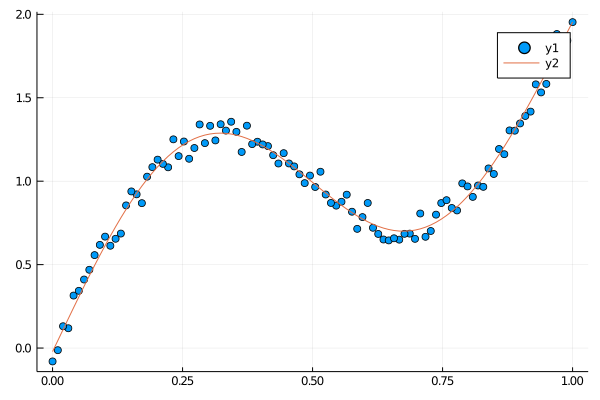

In [4]:
layers = [TanhLayer(1, 4), LinearLayer(4, 1)];
cost_function = SumSquareError();
nn = NeuralNetwork(layers, cost_function);

x_train, y_train = create_toy_data(func, 100);
X = collect(reshape(x_train, 1, 100));
t = collect(reshape(y_train, 1, 100));

for i in 1:50000
    X = collect(reshape(x_train, 1, 100));
    t = collect(reshape(y_train, 1, 100));
    
    fitting(nn, X, t, 0.001);
end

x_test = collect(reshape(range(0.0, stop=1.0, length=100), 1, 100));
X_test = copy(x_test);
X_test = predict(nn, X_test);

x_test = collect(reshape(x_test, 100));
X_test = collect(reshape(X_test, 100));
plot(x_train, y_train, seriestype=:scatter)
plot!(x_test, X_test)